#About Dataset
salaries dataset generally provides information about the employees of an organization in relation to their compensation. It typically includes details such as how much each employee is paid (their salary), their job titles, the departments they work in, and possibly additional information like their level of experience, education, and employment history within the organization.

# Features
- 'Id'
- 'EmployeeName'
- 'JobTitle'
- 'BasePay'
- 'OvertimePay'
- 'OtherPay'
- 'Benefits'
- 'TotalPay' -> salary
- 'TotalPayBenefits'
- 'Year'
- 'Notes'
- 'Agency'
- 'Status'


# Tasks

1. **Basic Data Exploration**: Identify the number of rows and columns in the dataset, determine the data types of each column, and check for missing values in each column.

2. **Descriptive Statistics**: Calculate basic statistics mean, median, mode, minimum, and maximum salary, determine the range of salaries, and find the standard deviation.

3. **Data Cleaning**: Handle missing data by suitable method with explain why you use it.

4. **Basic Data Visualization**: Create histograms or bar charts to visualize the distribution of salaries, and use pie charts to represent the proportion of employees in different departments.

5. **Grouped Analysis**: Group the data by one or more columns and calculate summary statistics for each group, and compare the average salaries across different groups.

6. **Simple Correlation Analysis**: Identify any correlation between salary and another numerical column, and plot a scatter plot to visualize the relationship.

8. **Summary of Insights**: Write a brief report summarizing the findings and insights from the analyses.

# Very Important Note
There is no fixed or singular solution for this assignment, so if anything is not clear, please do what you understand and provide an explanation.

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Load your dataset
salaries_df= pd.read_csv('/content/drive/MyDrive/Copy of Salaries.csv')
salaries_df.head()


,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
salaries_df.columns

Index(['Id', 'EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Notes', 'Agency',
       'Status'],
      dtype='object')

In [7]:
num_rows, num_columns = salaries_df.shape
data_types = salaries_df.dtypes
missing_values = salaries_df.isnull().sum()
print ("Rows_Number=",num_rows)
print("Columns_Number=",num_columns)
print("Data_Type=",data_types)
print ("The_Missing_Values=",missing_values)

Rows_Number= 148654
Columns_Number= 13
Data_Type= Id                    int64
EmployeeName         object
JobTitle             object
BasePay             float64
OvertimePay         float64
OtherPay            float64
Benefits            float64
TotalPay            float64
TotalPayBenefits    float64
Year                  int64
Notes               float64
Agency               object
Status              float64
dtype: object
The_Missing_Values= Id                       0
EmployeeName             0
JobTitle                 0
BasePay                609
OvertimePay              4
OtherPay                 4
Benefits             36163
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              148654
dtype: int64


basic_stats=         BasePay  TotalPay
count  148045.0  148654.0
mean    66325.4   74768.3
std     42764.6   50517.0
min      -166.0    -618.1
25%     33588.2   36169.0
50%     65007.4   71426.6
75%     94691.0  105839.1
max    319275.0  567595.4
salary_range= (567595.43, '-', -618.13)
std_deviation= 50517.0
Duplicate values found in 'EmployeeName' column:
            Id      EmployeeName
5            6    DAVID SULLIVAN
8            9    MICHAEL MORRIS
13          14       JOHN MARTIN
33          34        JOHN TURSI
40          41  MICHAEL THOMPSON
...        ...               ...
148648  148649       Leon Walker
148649  148650     Roy I Tillery
148650  148651      Not provided
148651  148652      Not provided
148652  148653      Not provided

[72117 rows x 2 columns]


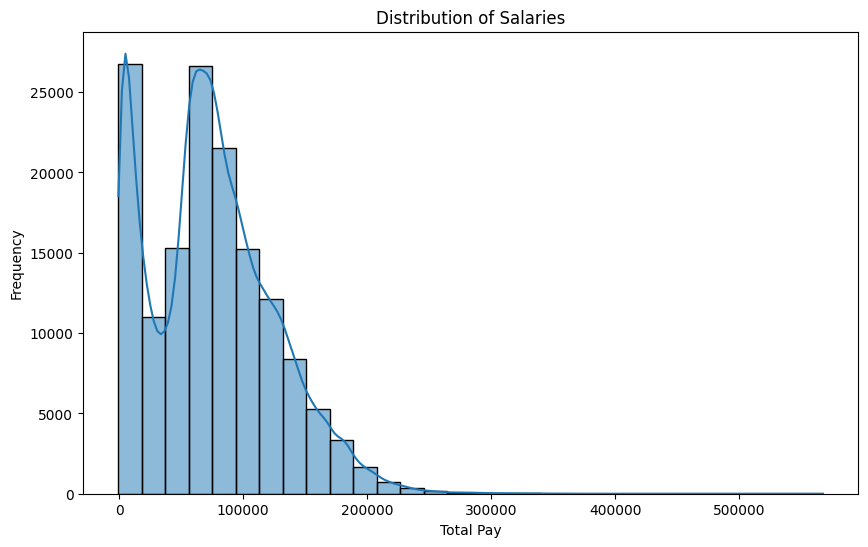

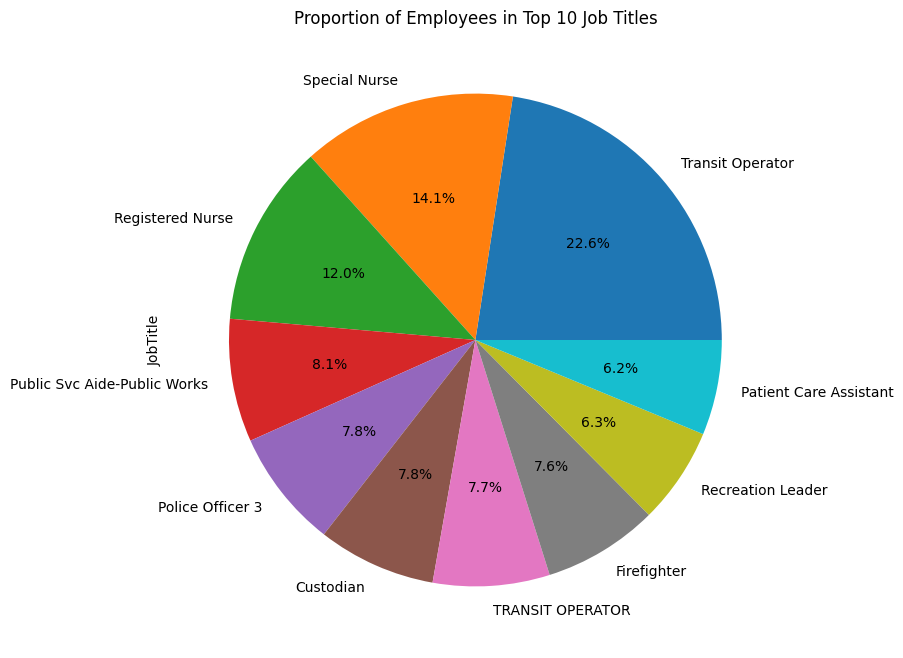

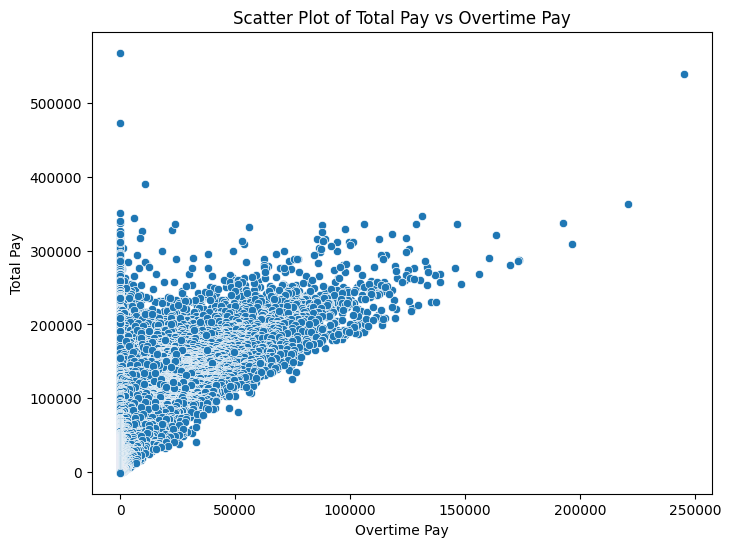

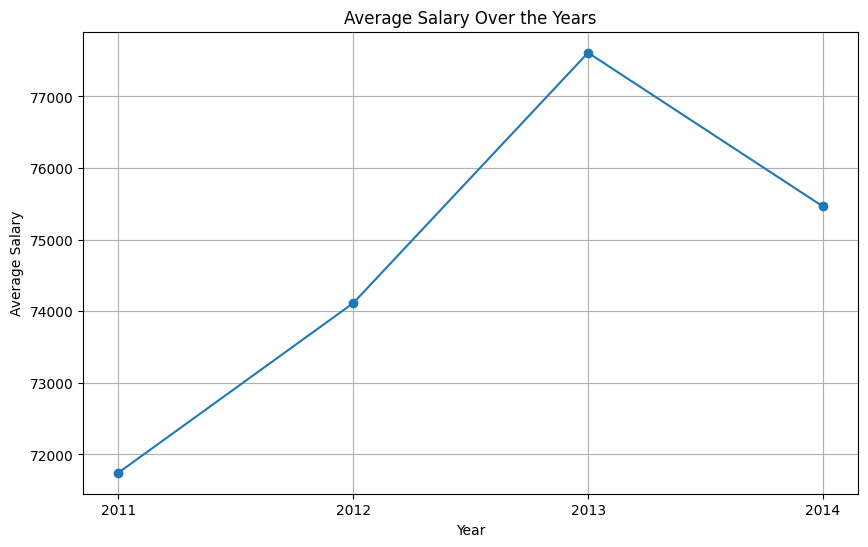

In [10]:
basic_stats = salaries_df[['BasePay', 'TotalPay']].describe()
salary_range = ((salaries_df['TotalPay'].max()),"-" ,(salaries_df['TotalPay'].min()))
std_deviation = salaries_df['TotalPay'].std()
#salaries_df['BasePay'] = salaries_df['BasePay'].replace(salaries_df[salaries_df['BasePay'] <= 0]['BasePay'].mean(), inplace=True)
#salaries_df['TotalPay'] = salaries_df['TotalPay'].replace(salaries_df[salaries_df['TotalPay'] <= 0]['BasePay'].mean(), inplace=True)
print("basic_stats=",basic_stats.round(1))
print ("salary_range=",salary_range)
print ("std_deviation=",std_deviation.round(1))

duplicate_ids = salaries_df[salaries_df.duplicated('Id', keep=False)]

# Check for duplicate values in 'EmployeeName'
duplicate_names = salaries_df[salaries_df.duplicated('EmployeeName', keep=False)]

# Print if there are any duplicates in 'Id' or 'EmployeeName'
if not duplicate_ids.empty:
    print("Duplicate values found in 'Id' column:")
    print(duplicate_ids[['Id', 'EmployeeName']])

if not duplicate_names.empty:
    print("Duplicate values found in 'EmployeeName' column:")
    print(duplicate_names[['Id', 'EmployeeName']])


#mean_total_pay_without_minus_zero = salaries_df[salaries_df['TotalPay'] > 0]['TotalPay'].mean()

# Replace values <= 0 in 'TotalPay' with mean_total_pay_without_minus_zero
#salaries_df.loc[salaries_df['TotalPay'] <= 0, 'TotalPay'] = mean_total_pay_without_minus_zero
#mean_total_pay_Without_minus_zero = salaries_df[salaries_df['TotalPay'] > 0]['TotalPay'].mean()
#salaries_df.loc[salaries_df['TotalPay'] <= 0, 'TotalPay'] = mean_total_pay_without_minus_zero

#print(f"The mean of 'TotalPay' excluding values <= 0 is: {mean_total_pay_Without_minus_zero}")

#salaries_df['BasePay'] = salaries_df['BasePay'].replace(salaries_df[salaries_df['BasePay'] <= 0]['BasePay'].mean(), inplace=True)
#salaries_df['TotalPay'] = salaries_df['TotalPay'].replace(salaries_df[salaries_df['TotalPay'] <= 0]['BasePay'].mean(), inplace=True)
#after replacing <=0 values
#basic_stats = salaries_df[['BasePay', 'TotalPay']].describe()
#salary_range = ((salaries_df['TotalPay'].max()),"-" ,(salaries_df['TotalPay'].min()))
#std_deviation = salaries_df['TotalPay'].std()
# Basic Data Visualization
plt.figure(figsize=(10, 6))
sns.histplot(salaries_df['TotalPay'], bins=30, kde=True)
plt.title('Distribution of Salaries')
plt.xlabel('Total Pay')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(8, 8))
dept_proportion = salaries_df['JobTitle'].value_counts().head(10)
dept_proportion.plot(kind='pie', autopct='%1.1f%%')
plt.title('Proportion of Employees in Top 10 Job Titles')
plt.show()

grouped_by_department = salaries_df.groupby('JobTitle')['TotalPay'].mean().sort_values(ascending=False).head(10)

correlation = salaries_df[['TotalPay', 'OvertimePay']].corr()
plt.figure(figsize=(8, 6))
sns.scatterplot(x='OvertimePay', y='TotalPay', data=salaries_df)
plt.title('Scatter Plot of Total Pay vs Overtime Pay')
plt.xlabel('Overtime Pay')
plt.ylabel('Total Pay')
plt.show()


avg_salary_by_year = salaries_df.groupby('Year')['TotalPay'].mean()

avg_salary_by_year.index = avg_salary_by_year.index.astype(int)

plt.figure(figsize=(10, 6))
avg_salary_by_year.plot(kind='line', marker='o')
plt.title('Average Salary Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Salary')
plt.grid(True)

plt.xticks(avg_salary_by_year.index)
plt.show()



# Good Luck!